In [371]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import itertools 
from scipy.signal import convolve

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# plot parameters
rcParams = {
    'axes.labelsize': 14,
    'font.size': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': [4, 3],
    'grid.linewidth': 0.0,
    'figure.subplot.hspace': 0.6,
    'figure.subplot.wspace': 0.6
   }

import matplotlib as mpl
mpl.rcParams.update(rcParams)

np.set_printoptions(precision=2)
np.set_printoptions(suppress=1)
np.seterr(all='print')

%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# read all data for one neuron

In [372]:
unit = 317
#f.close()

f = h5py.File('data_unit_'+str(unit)+'.hdf5','r')

# file contents
print(list(f.keys()))

# read the data
stimindex = f['stimindex'][()] # index to each stimulus (nan where no stimulus was shown)
spikes = f['spikes'][()] # spike times
block_starts = f['block_starts'][()] # start time of each stimulus block
block_stops = f['block_stops'][()]# end time of each stimulus block
stimulus = f['stimulus'][()] # the stimulus
f.close()

['block_starts', 'block_stops', 'spikes', 'stimindex', 'stimulus']


# Parameters and constants

In [373]:
# Sampling rate:
Fs = 7062.058198545425

#convert to seconds
spike_times = spikes/Fs
start = block_starts/Fs
end = block_stops/Fs

spike_time = []
for a in range(0,9):
    for i in spike_times:
        if i >= start[a]:
            if i <= end[a]:
                spike_time.append(i)

spike_time = np.array(spike_time)

spike_count = len(spike_time)
T = sum(end-start)

firing_rate = (spike_count)/T

spike_time0 = []
for i in spike_times:
    if i >= start[0]:
        if i <= end[0]:
            spike_time0.append(i)

spike_time0 = np.array(spike_time0)
wait0 =  np.diff(spike_time0)

spike_time1 = []
for i in spike_times:
    if i >= start[1]:
        if i <= end[1]:
            spike_time1.append(i)
spike_time1 = np.array(spike_time1)
wait1 =  np.diff(spike_time1)


spike_time2 = []
for i in spike_times:
    if i >= start[2]:
        if i <= end[2]:
            spike_time2.append(i)
spike_time2 = np.array(spike_time2)
wait2 =  np.diff(spike_time2)


spike_time3 = []
for i in spike_times:
    if i >= start[3]:
        if i <= end[3]:
            spike_time3.append(i)
spike_time3 = np.array(spike_time3)
wait3 = np.diff(spike_time3)

spike_time4 = []
for i in spike_times:
    if i >= start[4]:
        if i <= end[4]:
            spike_time4.append(i)
spike_time4 = np.array(spike_time4)
wait4 =  np.diff(spike_time4)

spike_time5 = []
for i in spike_times:
    if i >= start[5]:
        if i <= end[5]:
            spike_time5.append(i)

spike_time5 = np.array(spike_time5)
wait5 =  np.diff(spike_time5)

spike_time6 = []
for i in spike_times:
    if i >= start[6]:
        if i <= end[6]:
            spike_time6.append(i)

spike_time6 = np.array(spike_time6)
wait6 =  np.diff(spike_time6)

spike_time7 = []
for i in spike_times:
    if i >= start[7]:
        if i <= end[7]:
            spike_time7.append(i)

spike_time7 = np.array(spike_time7)
wait7 =  np.diff(spike_time7)

spike_time8 = []
for i in spike_times:
    if i >= start[8]:
        if i <= end[8]:
            spike_time8.append(i)
spike_time8 = np.array(spike_time8)
wait8 =  np.diff(spike_time8)

K = len(block_starts)

ws1 = np.concatenate((wait0, wait1, wait2))
ws2 = np.concatenate((wait3, wait4, wait5))
ws3 = np.concatenate((wait6, wait7, wait8))
waiting_times = np.concatenate((ws1, ws2, ws3))

mean = np.mean(waiting_times)

mean_sq = sum(waiting_times**2)/len(waiting_times)

variance = mean_sq - (mean**2)

C_v = np.sqrt(variance)/mean

print("Coefficient of Variance = ", C_v)





Coefficient of Variance =  1.0246383132327854


In [374]:
#Question 2.

# stimulus duration in sample frames (approx)
stim_len = 235.

# STA parameters
t_past   = 0.50  # seconds
t_future = 0 # seconds
t_sample = t_past*Fs
min_interval = int(stim_len/2) # step size for STA (resolution)

# Hint

# to obtain the spike times during stimulus presentations, use this:
spikes_stim = np.concatenate([spikes[(spikes>=a)&(spikes<b)] for (a,b) in zip(block_starts,block_stops)])


stim_full = np.zeros((30,12,12))
# look at each spike
for i in spikes_stim:
    stim = []
    #print(i)
    # for each spike go back t_sample time and create time steps of length min_interval
    # get the stimulus at each time step
    for j in range(int(i-t_sample)+min_interval,i,min_interval):
        if np.isnan(stimindex[j]):
            stim.append(np.zeros((12,12)))
        else:
            stim.append(stimulus[int(stimindex[j])])
    stim = np.array(stim)
    # add each 30x12x12 matrix for each spike and divide by the total number of spikes to get the average
    stim_full += stim

stim_full = stim_full/len(spikes_stim)
ind1, ind2, ind3 = np.where(stim_full == max(stim_full.min(), stim_full.max(), key=abs))
print(max(stim_full.min(), stim_full.max(), key=abs))
print(ind1, ind2, ind3)
print(stim_full[int(ind1)][int(ind2)][int(ind3)])

plot_list = []
for i in range(0,30):
    plot_list.append(stim_full[i][int(ind2)][int(ind3)])
    
max(stim_full.min(), stim_full.max(), key=abs)

-0.1531005664218625
[23] [4] [7]
-0.1531005664218625


-0.1531005664218625

# Compute and plot the STA

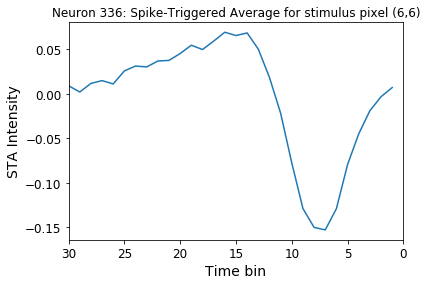

In [375]:
#t = np.arange(30, 0, -1)
plt.plot(t, plot_list)
plt.xlim(30, 0)
plt.xlabel('Time bin')
plt.ylabel('STA Intensity')
plt.title('Neuron 336: Spike-Triggered Average for stimulus pixel (6,6)')
plt.grid(True)

plt.show()


Text(0.5, 1.0, 'Neuron 336: The spatial profile at the peak')

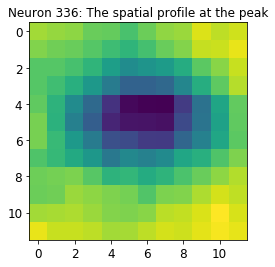

In [376]:
plt.imshow(stim_full[int(ind1)])
plt.title('Neuron 336: The spatial profile at the peak')


# fit the GLM

In [377]:
# Hint

# first prepare some matrices
# this will binthe data and stimulus indices so it is eacy to perform the convolution
from scipy.optimize import minimize
r = []
s = []
for (a,b) in zip(block_starts,block_stops):
    rt = np.zeros(int((b-a)//min_interval+1),dtype=bool)
    inds = (spikes>=a)&(spikes<b)
    rt[np.array(np.floor(spikes[inds]-a)/min_interval).astype(int)]=True
    st = np.array(stimindex[int(a):int(b):int(min_interval)]).astype(int)
    r.append(rt)
    s.append(st)
r = np.concatenate([ar for ar in r]) # spike or no in each bin
s = np.concatenate([ar for ar in s]) # index to stimulus in each bin (slice stimulus array)

def f(x):
    """
    Computes the logistic function as non-linearty
    """
    log = (1/(1+np.exp(-x)))
    return log

def convolution_kernel(k, s):
    """
    Convolves k and s
    """
    # pad kernel with zeros to ensure it is causal (only looks back in time)
    pad = np.concatenate([np.zeros((k.size-1)), s])
    conv = convolve(pad, k, mode = 'valid')
    return conv

def log_prob(k, s, r, alpha):
    """
    Computes the loss function for a Bernoulli GLM.
    """
    #dt = min_interval
    csk = convolution_kernel(k, s)
    f_ = f(csk)
    # Compute the negative log-likelihood
    Neg_log_lik = -np.sum(r*np.log(f_) + (1-r)*np.log(1-f_))
    # Compute the L2 regularization penalty
    L2_reg = alpha*np.sum(k**2)
    loss_func = np.sum(Neg_log_lik+L2_reg)           
    return loss_func

def kernel(pix, ker, r, alpha):
    """
    Finds the params that minimise the loss function, using 
    the Nelder-Mead algorithm as the numerical minimiser
    """
    ker = minimize(log_prob, x0=ker[::-1], args=(pix, r, alpha), method='Nelder-Mead', options={'disp':True, 'maxiter':300})
    return ker.x

glm = kernel(stimulus[s, int(ind2), int(ind3)], plot_list, r, 500)


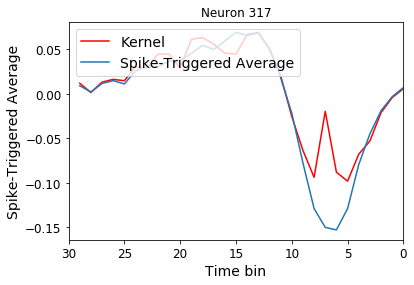

In [381]:
plt.plot(glm, color="red", label ="Kernel")
plt.xlabel('Time bin')
plt.ylabel('Spike-Triggered Average')
plt.title('Neuron 317')
plt.grid(True)
plt.plot(plot_list, label ="Spike-Triggered Average")
plt.xlim(30, 0)
plt.legend(loc='upper left')

plt.show()